In [1]:
#!gsutil ls
#!gsutil cp -r "gs://ba820-project/Yelp JSON" data
#!tar -xvf data/'Yelp JSON'/yelp_dataset.tar
#!pip install pyarrow

In [3]:
# Ignore the below. Code to convert json to parquet. Do not rerun code.
#path = 'yelp_academic_dataset_business.json'
#path1 = 'yelp_academic_dataset_user.json'
#path2 = 'yelp_academic_dataset_review.json'
#business = pd.read_json(path, lines = True)
#user = pd.read_json(path1, lines = True)
#chunk_size = 100000
#dfs = []
#for chunk in pd.read_json(path2, lines=True, chunksize=chunk_size):
    #dfs.append(chunk)
#df = pd.concat(dfs, ignore_index=True)

In [1]:
import pandas as pd
users = pd.read_parquet("users.parquet")

In [2]:
business = pd.read_json("yelp_academic_dataset_business.json", lines = True)

In [16]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
review = pd.read_parquet("reviews.parquet")

In [7]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [13]:
users.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [15]:
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [14]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [22]:
len(business)

150346

In [ ]:
# attributes has to do with "services and amenities offered, as well as other details that are important to many consumers when selecting a business to patronize."
# we can either remove the rows with missing data (this would remove that business all together) or we can remove the entire column (remove attributes for all business).
# same for the null values in "hours"

In [4]:
review['review_length'] = review['text'].str.len()
print(review['review_length'].describe())

count    6.990280e+06
mean     5.677644e+02
std      5.272578e+02
min      1.000000e+00
25%      2.290000e+02
50%      4.060000e+02
75%      7.200000e+02
max      5.000000e+03
Name: review_length, dtype: float64


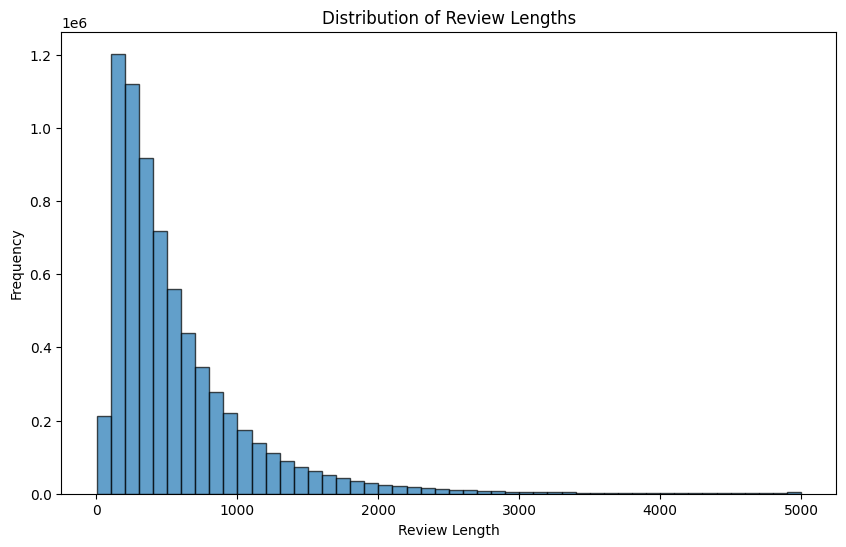

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(review['review_length'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


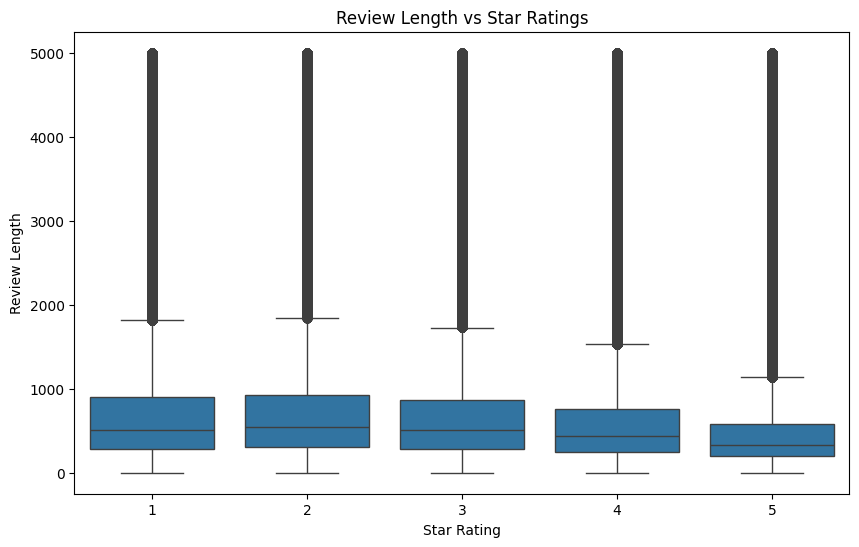

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='review_length', data=review)
plt.title('Review Length vs Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()


In [ ]:
import re
from collections import Counter

def tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text.split()

all_reviews = ' '.join(review['text'])
tokens = tokenize(all_reviews)
word_counts = Counter(tokens)
print(word_counts.most_common(20))


In [7]:
# top 10 users by review counts
top_users = users.sort_values('review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_users[['user_id', 'name', 'review_count', 'average_stars']])


Top 10 Users by Review Count:
                       user_id      name  review_count  average_stars
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox         17473           3.77
795339  8k3aO-mPeyhbR5HUucA5aA    Victor         16978           3.35
4723    hWDybu_KvYLSdEFzGrniTw     Bruce         16567           3.67
606393  RtGqdDBvvBCjcu5dUqwfzA     Shila         12868           3.87
152     P5bUL3Engv-2z6kKohB6qQ       Kim          9941           3.81
3977    nmdkHL2JKFx55T3nq5VziA    Nijole          8363           3.75
17727   bQCHF5rn5lMI9c5kEwCaNA   Vincent          8354           3.87
7394    8RcEwGrFIgkt9WQ35E6SnQ    George          7738           3.49
10873   Xwnf20FKuikiHcSpcEbpKQ   Kenneth          6766           3.32
1229    CxDOIDnH8gp9KXzpBHJYXw  Jennifer          6679           3.34


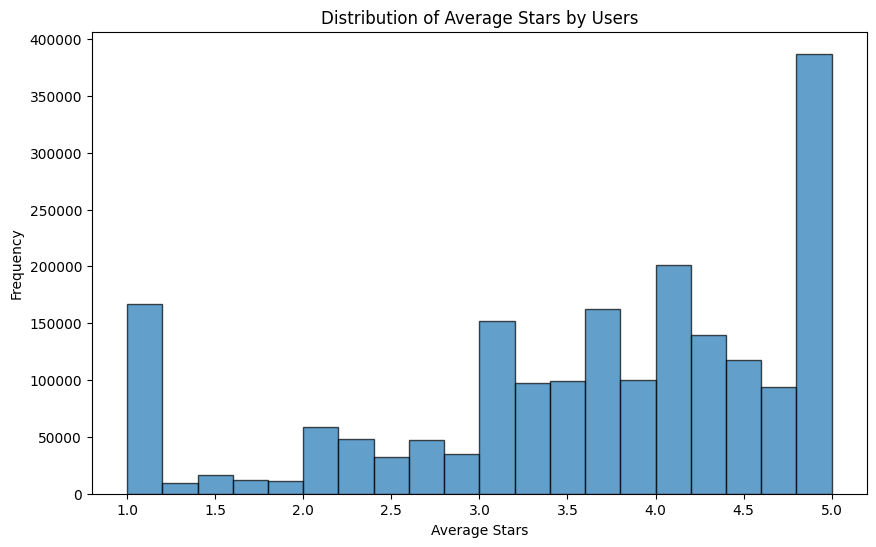

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(users['average_stars'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Stars by Users')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

In [17]:
# merging users and review files on user_id
merged_df = review.merge(users, on='user_id', how='outer')
merged_df.head()

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,review_length,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,rJ3CASyRfG-7ZviCBFCJQg,---1lKK3aKOuomHnwAkAow,f19eLfhXqR47Ct8Hz2y_pA,5,0,0,0,I hard think luxurious experience begins to de...,2018-12-19 22:26:22,637,...,3.0,2.0,1.0,0.0,5.0,9.0,9.0,9.0,9.0,0.0
1,xJuVVh0wspQlCPgTcbbiIg,---2PmXbF47D870stH1jqA,hKameFsaXh9g8WQbv593UA,5,0,0,0,No matter what night we go....Service and food...,2014-10-28 14:38:58,360,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2,hdtWMFs_rFCD7YLD8L4mNQ,---2PmXbF47D870stH1jqA,hKameFsaXh9g8WQbv593UA,5,0,0,0,This is our regular Wednesday night place to g...,2014-07-10 04:15:23,195,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
3,LBxTq5kq_EeazNCbEz0x5Q,---2PmXbF47D870stH1jqA,KP5OncF2jhT7_J1phHPPww,5,1,0,1,What a wonderful dining experience.... From th...,2015-06-27 23:38:13,833,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
4,--C3ehBCy19vbW6ec-gr7w,---2PmXbF47D870stH1jqA,igC3UWYb9RF5CXOQOVypMw,5,3,2,2,Great lunch today .\nGreeted and Seated immedi...,2013-04-03 19:06:00,411,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0


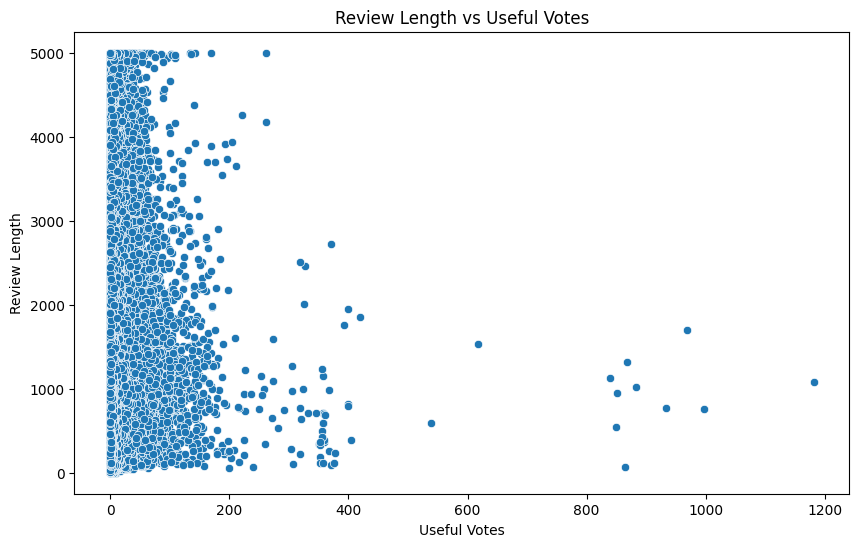

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='useful_x', y='review_length', data=merged_df)
plt.title('Review Length vs Useful Votes')
plt.xlabel('Useful Votes')
plt.ylabel('Review Length')
plt.show()
